# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [9]:
# URL raw file
url = "https://raw.githubusercontent.com/sugengcahyono/Machine_Learning/main/Clustering/data_penjualan%20(1).csv"

# Membaca file CSV dari URL
test = pd.read_csv(url)

test.head()

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,8/5/2022,Foodpak260,1000,1800,1800000
1,8/5/2022,FoodpakMatte245,1000,1900,1900000
2,8/5/2022,CraftLaminasi290,5000,750,3750000
3,8/5/2022,CraftLaminasi290,1000,1200,1200000
4,8/7/2022,Dupleks310,1000,1550,1550000


In [10]:
train = pd.read_csv(url)
train.head()

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,8/5/2022,Foodpak260,1000,1800,1800000
1,8/5/2022,FoodpakMatte245,1000,1900,1900000
2,8/5/2022,CraftLaminasi290,5000,750,3750000
3,8/5/2022,CraftLaminasi290,1000,1200,1200000
4,8/7/2022,Dupleks310,1000,1550,1550000


In [11]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tanggal       1076 non-null   object
 1   Jenis Produk  1076 non-null   object
 2   Jumlah Order  1076 non-null   int64 
 3   Harga         1076 non-null   int64 
 4   Total         1076 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 42.2+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 1. Memahami Struktur Data

In [12]:
train.head()

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,8/5/2022,Foodpak260,1000,1800,1800000
1,8/5/2022,FoodpakMatte245,1000,1900,1900000
2,8/5/2022,CraftLaminasi290,5000,750,3750000
3,8/5/2022,CraftLaminasi290,1000,1200,1200000
4,8/7/2022,Dupleks310,1000,1550,1550000


In [13]:
# Meninjau jumlah baris dan kolom
rows, cols = train.shape
print(f"Jumlah baris: {rows}")
print(f"Jumlah kolom: {cols}")


Jumlah baris: 1076
Jumlah kolom: 5


In [14]:
# Meninjau jenis data setiap kolom
print("Jenis data setiap kolom:")
print(train.dtypes)

# Identifikasi apakah numerikal atau kategorikal
print("\nKategori tipe data:")
for column in train.columns:
    if train[column].dtype == 'object':
        print(f"{column}: Kategorikal")
    else:
        print(f"{column}: Numerikal")


Jenis data setiap kolom:
Tanggal         object
Jenis Produk    object
Jumlah Order     int64
Harga            int64
Total            int64
dtype: object

Kategori tipe data:
Tanggal: Kategorikal
Jenis Produk: Kategorikal
Jumlah Order: Numerikal
Harga: Numerikal
Total: Numerikal


In [17]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
train.describe()

,Jumlah Order,Harga,Total
count,1076.000000,1076.000000,1.076000e+03
mean,1904.933086,1703.781599,2.345827e+06
std,2500.918899,3355.881482,1.730798e+06
min,5.000000,100.000000,1.537600e+04
25%,1000.000000,950.000000,1.312500e+06
50%,1000.000000,1500.000000,1.800000e+06
75%,2000.000000,1850.000000,3.000000e+06
max,40000.000000,99970.000000,2.149355e+07


### 2. Menangani Data yang Hilang

In [15]:
# Identifikasi data yang hilang
print("Jumlah data yang hilang di setiap kolom:")
print(train.isnull().sum())

Jumlah data yang hilang di setiap kolom:
Tanggal         0
Jenis Produk    0
Jumlah Order    0
Harga           0
Total           0
dtype: int64


### 3. Analisis Distribusi dan Korelasi

Statistik Deskriptif:
       Jumlah Order         Harga         Total
count   1076.000000   1076.000000  1.076000e+03
mean    1904.933086   1703.781599  2.345827e+06
std     2500.918899   3355.881482  1.730798e+06
min        5.000000    100.000000  1.537600e+04
25%     1000.000000    950.000000  1.312500e+06
50%     1000.000000   1500.000000  1.800000e+06
75%     2000.000000   1850.000000  3.000000e+06
max    40000.000000  99970.000000  2.149355e+07


<Figure size 1000x600 with 0 Axes>

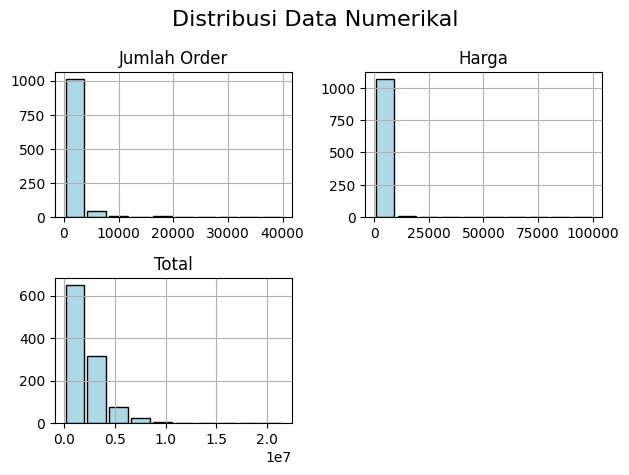

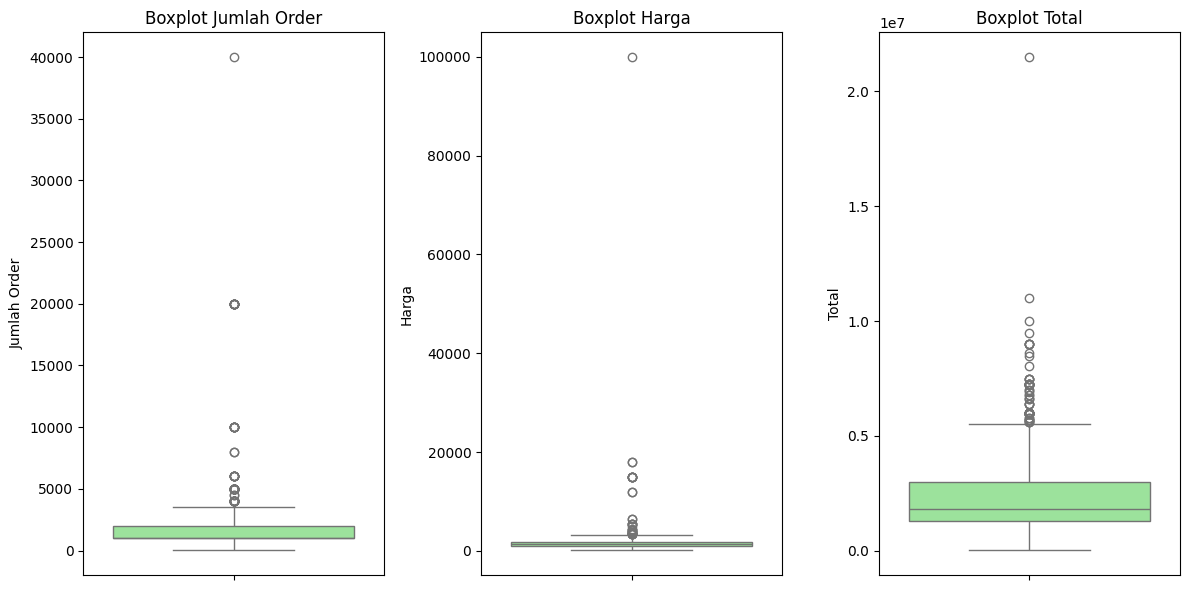


Matriks Korelasi:
              Jumlah Order     Harga     Total
Jumlah Order      1.000000 -0.107306  0.548134
Harga            -0.107306  1.000000  0.309245
Total             0.548134  0.309245  1.000000


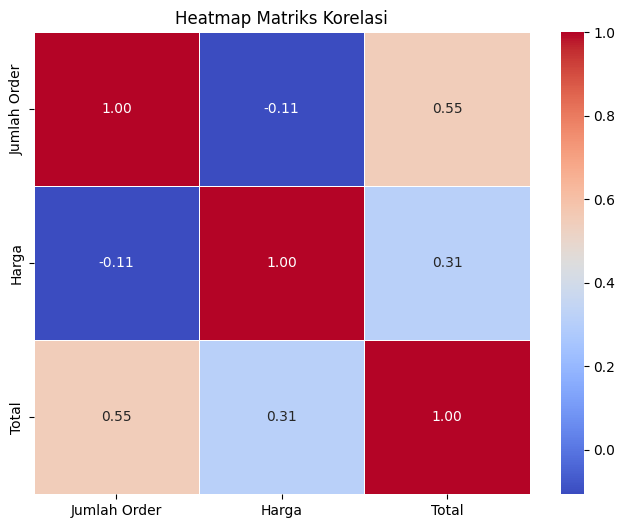

In [42]:
df = pd.DataFrame(train)
# 1. Statistik Deskriptif
print("Statistik Deskriptif:")
print(df.describe())

# 2. Visualisasi Distribusi (Histogram)
numerical_columns = ['Jumlah Order', 'Harga', 'Total']

# Membuat histogram untuk distribusi data numerik
plt.figure(figsize=(10, 6))
df[numerical_columns].hist(bins=10, edgecolor='black', color='lightblue', rwidth=0.85)
plt.suptitle('Distribusi Data Numerikal', fontsize=16)
plt.tight_layout()
plt.show()

# 3. Boxplot untuk deteksi outlier
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[column], color='lightgreen')
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

# 4. Matriks Korelasi
correlation_matrix = df[numerical_columns].corr()
print("\nMatriks Korelasi:")
print(correlation_matrix)

# 5. Heatmap untuk Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Matriks Korelasi')
plt.show()

### 4. Visualisasi Data

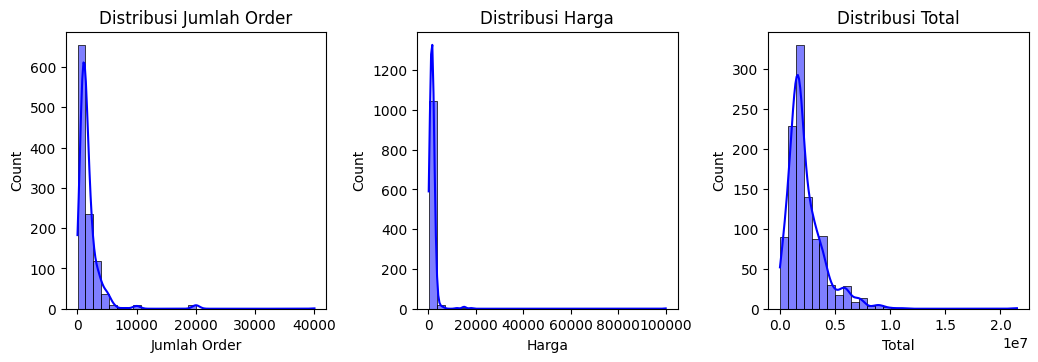

In [43]:
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

<ipython-input-22-fd7ce0888d90>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Jenis Produk', data=df, palette='pastel')


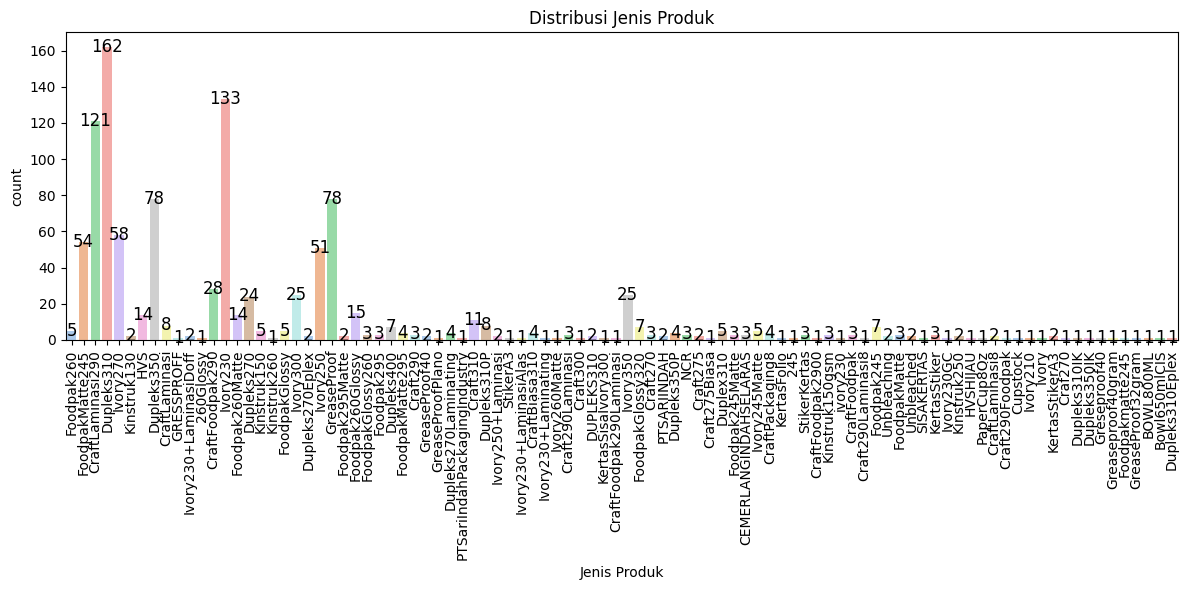

In [22]:
# Visualisasi distribusi untuk variabel kategorikal 'Jenis Produk'
plt.figure(figsize=(12, 6))  # Ukuran figure yang lebih besar
sns.countplot(x='Jenis Produk', data=df, palette='pastel')

# Menambahkan jumlah data pada setiap kategori di atas batang
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.05,
             f'{int(p.get_height())}',
             ha='center', va='center', fontsize=12)

# Menambah rotasi label dan mengatur margin agar label tidak terpotong
plt.title('Distribusi Jenis Produk')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()

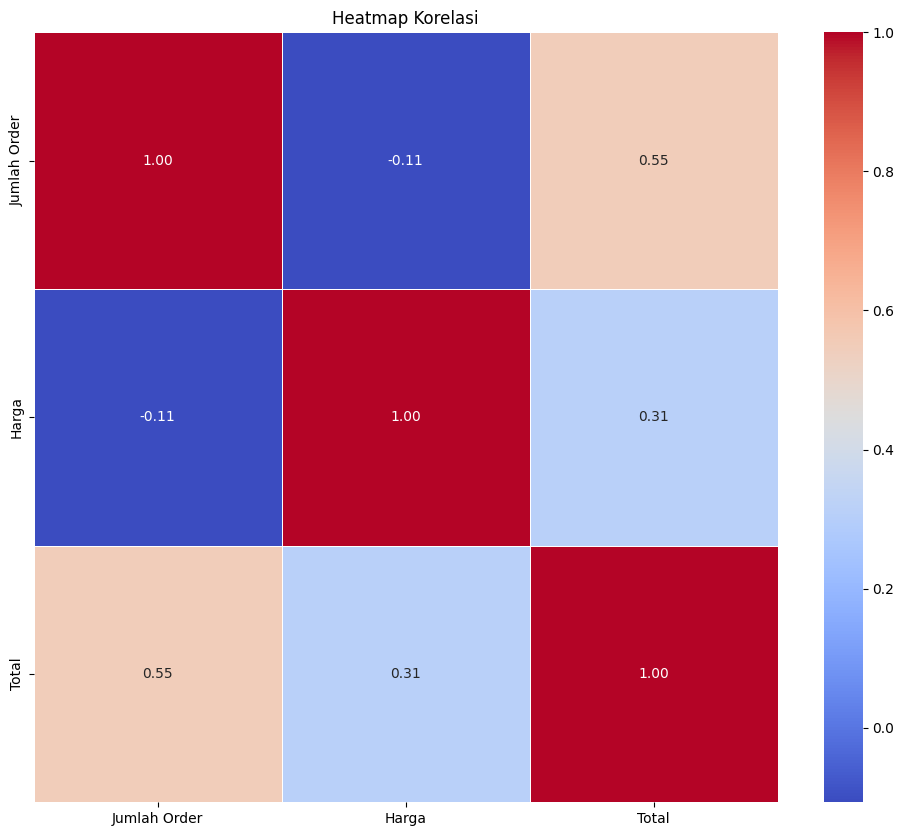

In [23]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

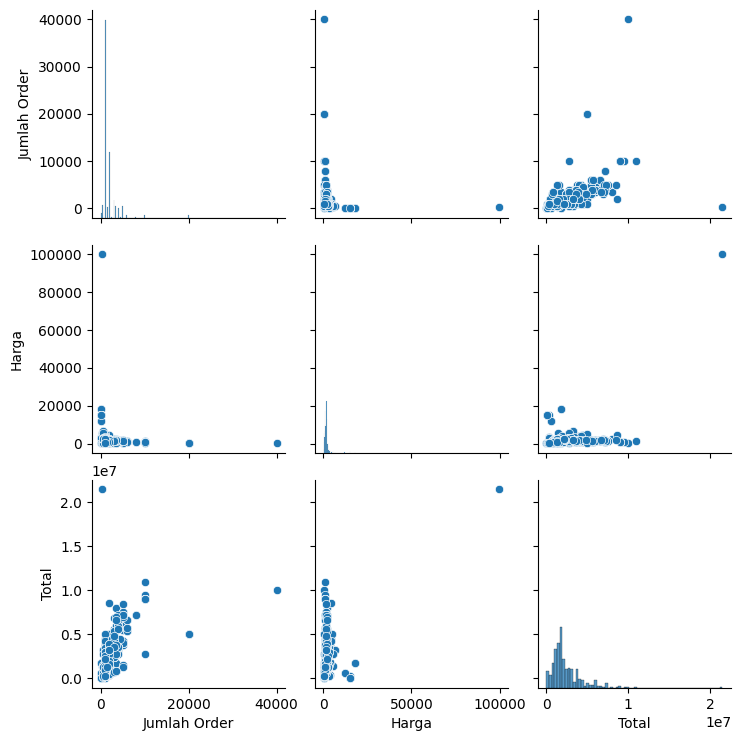

In [44]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

<ipython-input-34-0c807b1372e0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Jenis Produk', data=df[df['Jenis Produk'].isin(top_products.index)], palette='viridis')


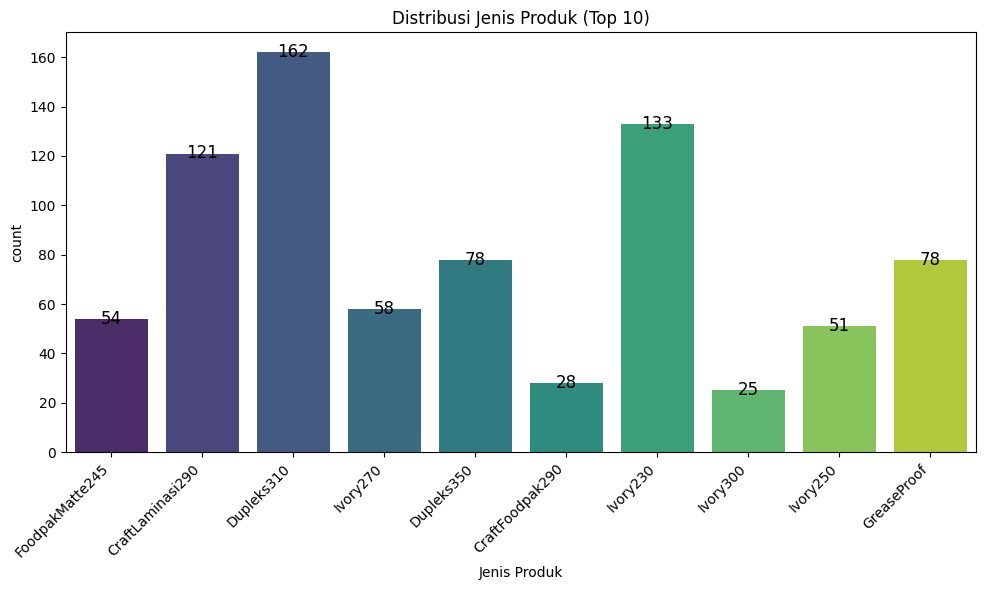

In [34]:

# Menghitung frekuensi produk
product_counts = df['Jenis Produk'].value_counts()


top_products = product_counts.head(10)
# Visualisasi distribusi untuk 10 produk teratas
plt.figure(figsize=(10, 6))  # Ukuran figure lebih besar
sns.countplot(x='Jenis Produk', data=df[df['Jenis Produk'].isin(top_products.index)], palette='viridis')

# Menambahkan jumlah data pada setiap kategori di atas batang
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.05,
             f'{int(p.get_height())}',
             ha='center', va='center', fontsize=12)

# Menambah rotasi label dan mengatur margin agar label tidak terpotong
plt.title('Distribusi Jenis Produk (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Untuk memastikan label tidak terpotong
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### Cek Missing Values

In [35]:
# Mengecek missing values
missing_values = df.isnull().sum()

# Menampilkan jumlah missing values di setiap kolom
print("Jumlah Missing Values di Setiap Kolom:")
print(missing_values)

Jumlah Missing Values di Setiap Kolom:
Tanggal         0
Jenis Produk    0
Jumlah Order    0
Harga           0
Total           0
dtype: int64


In [36]:
df.head()

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,8/5/2022,Foodpak260,1000,1800,1800000
1,8/5/2022,FoodpakMatte245,1000,1900,1900000
2,8/5/2022,CraftLaminasi290,5000,750,3750000
3,8/5/2022,CraftLaminasi290,1000,1200,1200000
4,8/7/2022,Dupleks310,1000,1550,1550000


### Konversi Kolom Tanggal

In [46]:
# Mengonversi kolom 'Tanggal' ke tipe datetime dengan menambahkan dayfirst=True
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True, errors='coerce')

# Konfirmasi tipe data setelah konversi
print("Tipe data kolom setelah konversi:")
print(df.dtypes)

Tipe data kolom setelah konversi:
Tanggal         datetime64[ns]
Jenis Produk            object
Jumlah Order             int64
Harga                    int64
Total                    int64
dtype: object


In [47]:
# Meninjau jenis data setiap kolom
print("Jenis data setiap kolom:")
print(df.dtypes)

Jenis data setiap kolom:
Tanggal         datetime64[ns]
Jenis Produk            object
Jumlah Order             int64
Harga                    int64
Total                    int64
dtype: object


### Encoding Data Kategorikal Jenis Produk


In [48]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi kolom 'Jenis Produk' menjadi angka
df['Jenis Produk'] = label_encoder.fit_transform(df['Jenis Produk'])

# Menampilkan hasil

df.head()

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,2022-05-08,40,1000,1800,1800000
1,2022-05-08,49,1000,1900,1900000
2,2022-05-08,21,5000,750,3750000
3,2022-05-08,21,1000,1200,1200000
4,2022-07-08,29,1000,1550,1550000


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

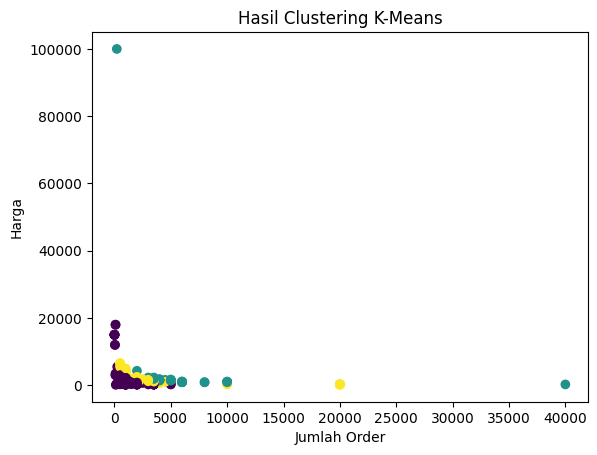

        Tanggal  Jenis Produk  Jumlah Order  Harga    Total  Cluster
0    2022-05-08            40          1000   1800  1800000        0
1    2022-05-08            49          1000   1900  1900000        0
2    2022-05-08            21          5000    750  3750000        2
3    2022-05-08            21          1000   1200  1200000        0
4    2022-07-08            29          1000   1550  1550000        0
...         ...           ...           ...    ...      ...      ...
1071        NaT            63          1000    900   900000        0
1072        NaT            21          2000    800  1600000        0
1073        NaT            21          1500    875  1312500        0
1074        NaT            48          1000   2200  2200000        0
1075        NaT            53          1000    300   300000        0

[1076 rows x 6 columns]


In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Menyiapkan data (misalnya, memilih kolom numerik)
X = df[['Jumlah Order', 'Harga', 'Total']]  # Gantilah dengan kolom yang relevan

# Tentukan jumlah cluster (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Latih model
df['Cluster'] = kmeans.fit_predict(X)

# Visualisasi hasil clustering (jika data 2D atau 3D)
plt.scatter(df['Jumlah Order'], df['Harga'], c=df['Cluster'], cmap='viridis')
plt.title('Hasil Clustering K-Means')
plt.xlabel('Jumlah Order')
plt.ylabel('Harga')
plt.show()

# Menampilkan hasil cluster
print(df[['Tanggal', 'Jenis Produk', 'Jumlah Order', 'Harga', 'Total', 'Cluster']])


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

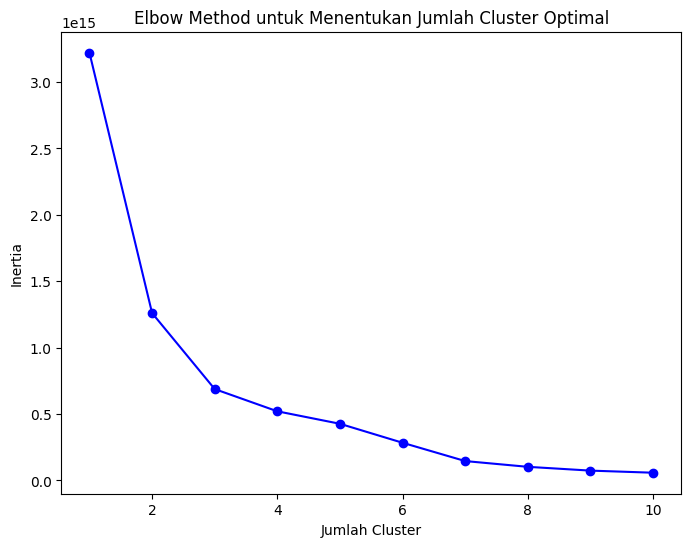

In [50]:
# Menyiapkan data (misalnya memilih kolom numerik)
X = df[['Jumlah Order', 'Harga', 'Total']]

# Inisialisasi list untuk menyimpan inertia
inertia = []

# Latih model untuk berbagai jumlah cluster (misalnya 1 sampai 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotkan grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

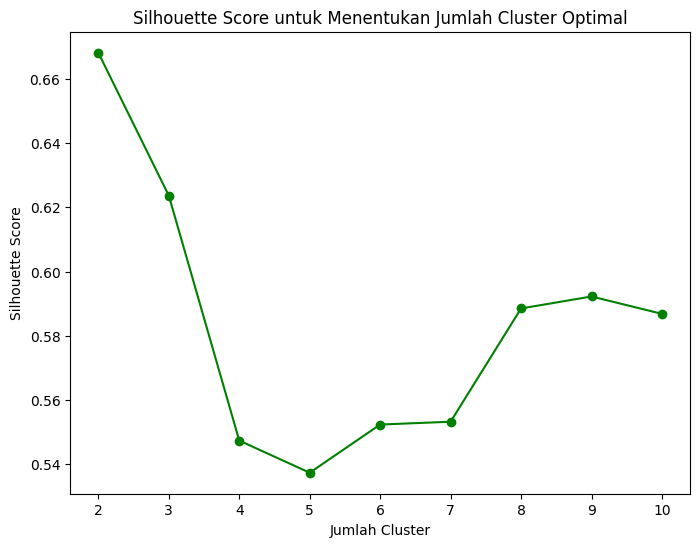

Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [57]:
from sklearn.metrics import silhouette_score
# Menyiapkan data (misalnya memilih kolom numerik)
X = df[['Jumlah Order', 'Harga', 'Total']]

# List untuk menyimpan silhouette score
sil_scores = []

# Latih model untuk berbagai jumlah cluster (misalnya 2 sampai 10)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    sil_scores.append(score)

# Menentukan jumlah cluster optimal berdasarkan Silhouette Score tertinggi
optimal_clusters = range(2, 11)[sil_scores.index(max(sil_scores))]

# Plotkan grafik Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='g')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

# Menampilkan hasil
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_clusters}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

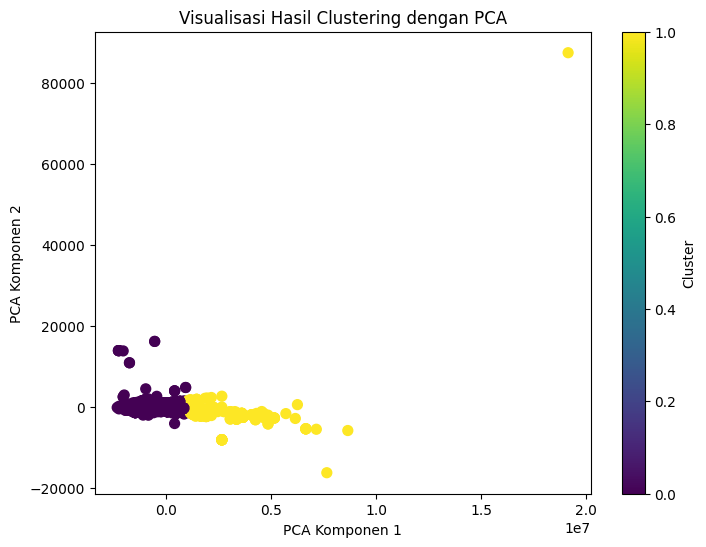

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Latih model KMeans dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Reduksi dimensi menggunakan PCA (menjadi 2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# Membuat scatter plot dari hasil PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.colorbar(label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [61]:
# Menambahkan label cluster ke dalam dataframe
df['Cluster'] = kmeans.labels_

# Analisis distribusi setiap fitur dalam masing-masing cluster
cluster_summary = df.groupby('Cluster').agg({
    'Jumlah Order': ['mean', 'std', 'min', 'max'],
    'Harga': ['mean', 'std', 'min', 'max'],
    'Total': ['mean', 'std', 'min', 'max']
}).reset_index()

# Menampilkan ringkasan karakteristik tiap cluster
print(cluster_summary)


  Cluster Jumlah Order                                 Harga               \
                  mean          std  min    max         mean          std   
0       0  1281.314385   727.346682    5  10000  1616.199536  1638.756226   
1       1  4416.892523  4638.395160  215  40000  2056.565421  6769.548601   

                      Total                                   
   min    max          mean           std      min       max  
0  100  18000  1.673285e+06  7.583444e+05    15376   3300000  
1  250  99970  5.054853e+06  1.894871e+06  3400000  21493550  


<ipython-input-60-b58343f45899>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Jumlah Order', data=df, palette='Set2')


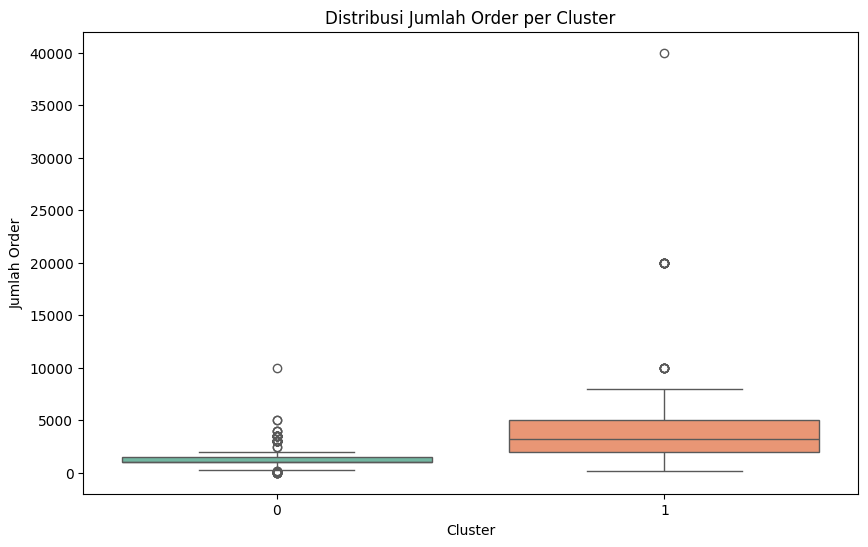

<ipython-input-60-b58343f45899>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Harga', data=df, palette='Set2')


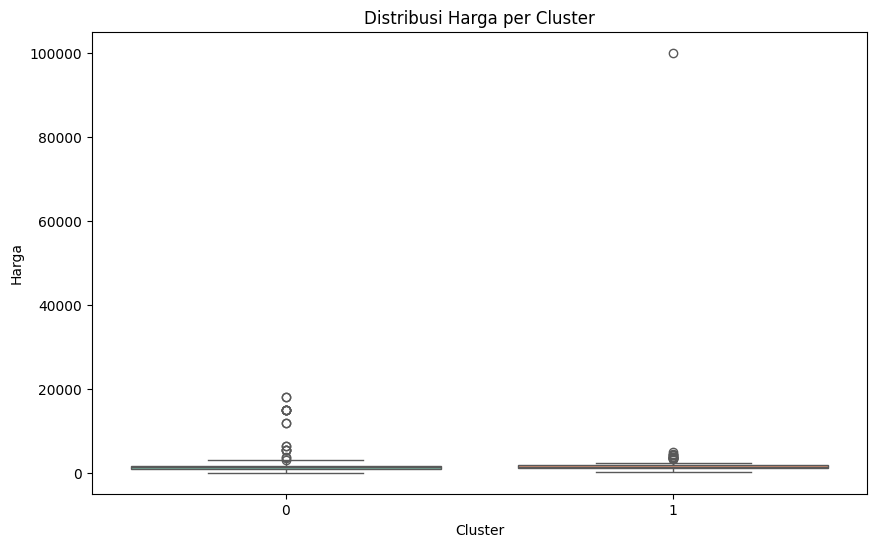

<ipython-input-60-b58343f45899>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Total', data=df, palette='Set2')


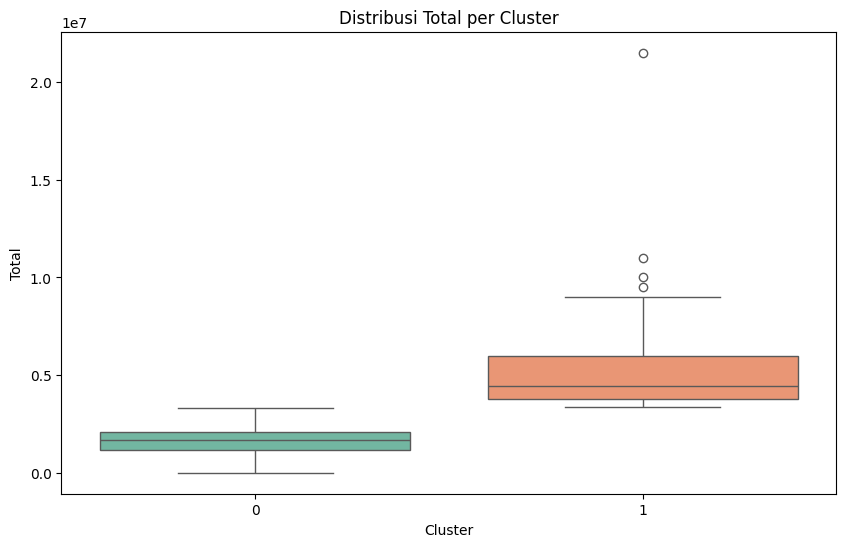

In [60]:
# Visualisasi distribusi Jumlah Order untuk tiap cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Jumlah Order', data=df, palette='Set2')
plt.title('Distribusi Jumlah Order per Cluster')
plt.show()

# Visualisasi distribusi Harga untuk tiap cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Harga', data=df, palette='Set2')
plt.title('Distribusi Harga per Cluster')
plt.show()

# Visualisasi distribusi Total untuk tiap cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total', data=df, palette='Set2')
plt.title('Distribusi Total per Cluster')
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 0:
*  Jumlah Order: Rata-rata jumlah order untuk Cluster 0 adalah sekitar 1281 dengan variasi yang cukup besar (std = 727). Ini menunjukkan bahwa cluster ini terdiri dari transaksi dengan jumlah order yang bervariasi, tetapi cenderung lebih rendah dibandingkan dengan Cluster 1.
*   Harga: Rata-rata harga produk dalam cluster ini adalah 1616 dengan variasi yang juga cukup besar (std = 1638). Meskipun harga rata-rata lebih rendah, variasinya menunjukkan bahwa ada beberapa produk dengan harga sangat tinggi atau sangat rendah.
*   Total: Total transaksi untuk cluster ini beragam, dengan rata-rata sekitar 1.67 juta dan variasi yang tinggi (std = 758.3 ribu). Nilai total tertinggi mencapai sekitar 3.3 juta, yang mengindikasikan bahwa beberapa transaksi dalam cluster ini memiliki nilai yang lebih kecil dibandingkan dengan cluster lainnya.


2. Cluster 1:
*   Jumlah Order: Rata-rata jumlah order untuk Cluster 1 adalah jauh lebih tinggi, yakni 4416, dengan variasi yang sangat besar (std = 4638). Ini menunjukkan bahwa transaksi dalam cluster ini memiliki jumlah order yang jauh lebih besar dibandingkan Cluster 0.
*   Harga: Harga rata-rata dalam Cluster 1 lebih tinggi (2056), dengan variasi yang sangat besar (std = 6769). Hal ini mengindikasikan bahwa produk dalam cluster ini memiliki harga yang lebih tinggi dan sangat bervariasi, bahkan mungkin ada produk dengan harga ekstrem.
*   Total: Total transaksi dalam Cluster 1 juga jauh lebih tinggi, dengan rata-rata sekitar 5.05 juta dan variasi yang sangat besar (std = 1.89 juta). Total transaksi tertinggi bisa mencapai sekitar 21.5 juta, yang menunjukkan bahwa cluster ini terdiri dari transaksi yang memiliki nilai yang lebih besar.


3. Kesimpulan:
*   Cluster 0: Mungkin mewakili segmen pelanggan dengan pembelian rutin tetapi dengan nilai yang lebih kecil. Strategi untuk cluster ini bisa berfokus pada peningkatan frekuensi pembelian atau menawarkan promosi dengan harga yang lebih terjangkau.
*   Cluster 1: Mewakili pelanggan yang melakukan pembelian besar atau pembelian produk dengan harga tinggi. Bisa jadi ini adalah segmen pelanggan premium atau pelanggan dengan kebutuhan produk dalam jumlah besar. Strategi untuk cluster ini bisa berfokus pada menawarkan layanan atau produk eksklusif, serta diskon atau insentif untuk pembelian besar.








# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [62]:
# Menambahkan kolom 'Cluster' ke DataFrame asli
df['Cluster'] = kmeans.labels_

# Mengekspor DataFrame ke dalam file CSV
df.to_csv('hasil_clustering.csv', index=False)

print("Data berhasil disimpan dalam 'hasil_clustering.csv'")

Data berhasil disimpan dalam 'hasil_clustering.csv'


In [63]:
cluster = pd.read_csv("/content/hasil_clustering.csv")
cluster.head(20)

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total,Cluster
0,2022-05-08,40,1000,1800,1800000,0
1,2022-05-08,49,1000,1900,1900000,0
2,2022-05-08,21,5000,750,3750000,1
3,2022-05-08,21,1000,1200,1200000,0
4,2022-07-08,29,1000,1550,1550000,0
5,2022-08-08,29,500,1900,950000,0
6,2022-08-08,72,1000,1700,1700000,0
7,2022-09-08,79,1000,1000,1000000,0
8,2022-09-08,59,1500,850,1275000,0
9,2022-09-08,33,500,1800,900000,0
